In [1]:
from skimage import img_as_float, io, color
from matplotlib import pyplot as plt
import numpy as np

(1080, 1920, 3)


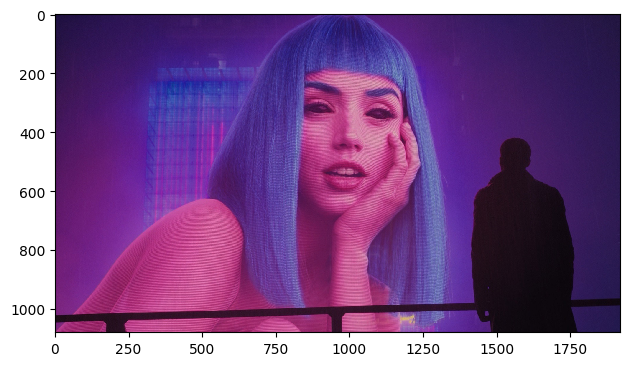

In [2]:
img = io.imread('look.jpg')

img_float = img/255

print(img_float.shape)
io.imshow(img_float)

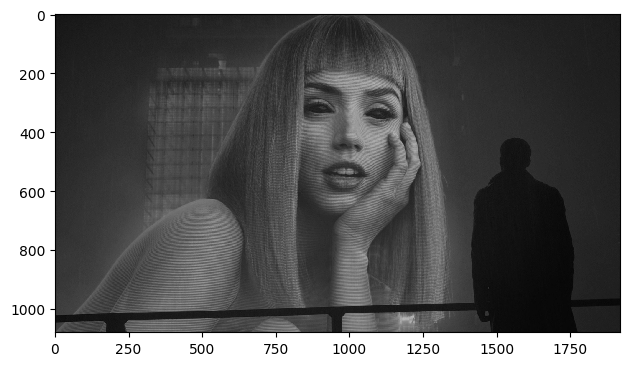

In [3]:
gray = color.rgb2gray(img)
io.imshow(gray)

# Метод средних

In [29]:
# Создание ядра
kernel = np.ones([15, 15])
kernel /= kernel.sum()

kernel

array([[0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444],
       [0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444],
       [0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444],
       [0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444],
       [0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 0.00444444, 0.00444444,
        0.00444444, 0.00444444, 0.00444444, 

In [30]:
def convolve2d(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Рассчитываем размеры выходного изображения
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1

    # Создаем пустой массив для выходного изображения
    output = np.zeros((output_height, output_width))

    # Проходим по каждому пикселю выходного изображения
    for i in range(output_height):
        for j in range(output_width):
            # Рассчитываем свертку для текущего пикселя
            output[i, j] = np.sum(image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return output

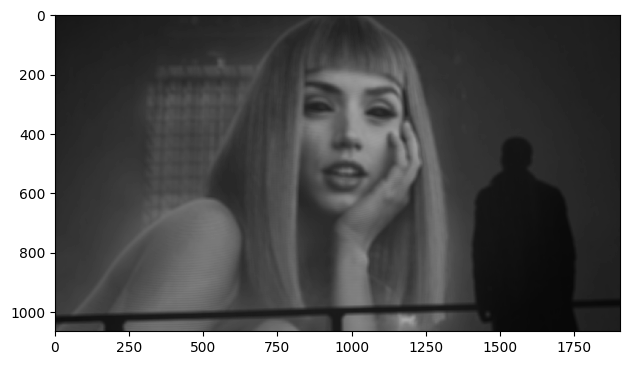

In [31]:
colvolved = convolve2d(gray, kernel)
colvolved = np.clip(colvolved, 0, 1)
io.imshow(colvolved)

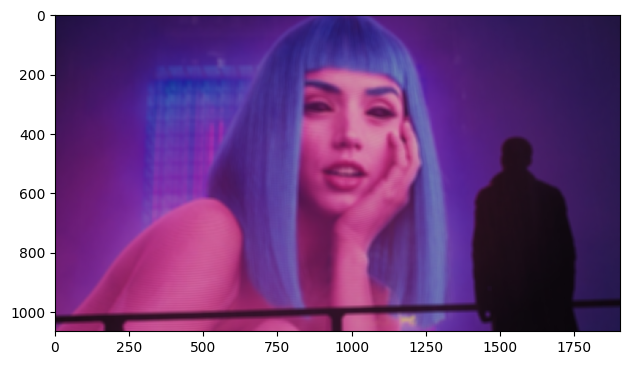

In [8]:
convolved_color = np.concatenate([
    convolve2d(img_float[..., i], kernel)[..., None] for i in range(3) 
], -1)
convolved_color = np.clip(convolved_color, 0, 1)
io.imshow(convolved_color)

# Метод Гаусса

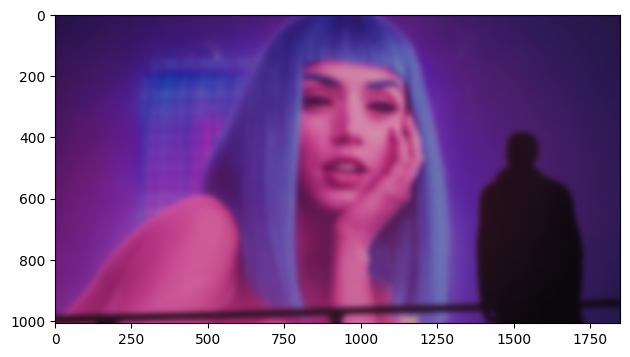

In [21]:
def convolution(image: np.ndarray, kernel: list | tuple) -> np.ndarray:

    if len(image.shape) == 3:
        m_i, n_i, c_i = image.shape

    # if the image is gray then we won't be having an extra channel so handling it
    elif len(image.shape) == 2:
        image = image[..., np.newaxis]
        m_i, n_i, c_i = image.shape
    else:
        raise Exception('Shape of image not supported')

    m_k, n_k = kernel.shape

    y_strides = m_i - m_k + 1  # possible number of strides in y direction
    x_strides = n_i - n_k + 1  # possible number of strides in x direction

    img = image.copy()
    output_shape = (m_i-m_k+1, n_i-n_k+1, c_i)
    output = np.zeros(output_shape, dtype=np.float32)

    count = 0  # taking count of the convolution operation being happening

    output_tmp = output.reshape(
        (output_shape[0]*output_shape[1], output_shape[2])
    )

    for i in range(y_strides):
        for j in range(x_strides):
            for c in range(c_i): # looping over the all channels
                sub_matrix = img[i:i+m_k, j:j+n_k, c]

                output_tmp[count, c] = np.sum(sub_matrix * kernel)

            count += 1

    output = output_tmp.reshape(output_shape)

    return output

def GaussianBlur(img: np.ndarray, sigma: float | int, filter_shape: list | tuple | None = None):

    if filter_shape == None:
        # generating filter shape with the sigma(standard deviation) given
        _ = 2 * int(4 * sigma + 0.5) + 1
        filter_shape = [_, _]

    elif len(filter_shape) != 2:
        raise Exception('shape of argument `filter_shape` is not a supported')

    m, n = filter_shape

    m_half = m // 2
    n_half = n // 2

    gaussian_filter = np.zeros((m, n), np.float32)

    for y in range(-m_half, m_half):
        for x in range(-n_half, n_half):
            normal = 1 / (2.0 * np.pi * sigma**2.0)
            exp_term = np.exp(-(x**2.0 + y**2.0) / (2.0 * sigma**2.0))
            gaussian_filter[y+m_half, x+n_half] = normal * exp_term

    blurred = convolution(img, gaussian_filter)
  
    return blurred


io.imshow(np.array(GaussianBlur(img_float, 9)))